<H1> google api 사용법</H1>
<br>
<H4>먼저 구글 클라우드 api 사용자 인증 정보를 만들어야 합니다 "사용자 인증 정보"를 클릭합니다<br><br>
구글 api를 사용하기 위해서는 총 두 가지 키가 필요합니다 <br><br>
먼저 google api키를 할당 받읍시다. 그 다음 서비스계정을 생성합니다. 다음의 과정을 거치면 됩니다<br><br>
서비스 계정을 만들면 키를 받을 수 있는데 그 키는 json파일로 받습니다.<br><br>
위 과정을 거쳤다면 다음과 같이 서비스계정키를 받을 수 있습니다.<br><br>
위 작업을 완료하였다면 사용자 인증정보에 두 개의 키가 있어야 합니다.<br><br>

<H4>이제 본격적으로 api를 사용해보도록 하겠습니다.<br><br>
우선 우리가 받은 키의 경로를 서비스계정키의 경로로 변경해줘야합니다<br> <br>
명령 프롬프트에서 <mark>set GOOGLE_APPLICATION_CREDENTIALS=KEY_PATH</mark>을 통해 설정할 수 있습니다 또한<br> <br>
코드에서 os명령어를 통해 할 수도 있습니다. 아래 코드에도 적어놨으니 참고하시면 될 듯합니다.<br><br>

그 다음 우선 pip를 최신으로 업그레이드 해주시고 <mark>pip install --upgrade pip</mark><br><br>
<mark>pip install --upgrade google-api-python-client</mark><br><br>
<mark>pip install --upgrade google-cloud-vision</mark><br><br>
를 통해 google cloud vision을 설치합니다.<br><br>
이제 끝났습니다 api 제공 코드를 실행시키면 됩니다. 아래 코드를 실행시켜주면 됩니다<br><br>

In [12]:
import io
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision_v1 import types #from google.cloud.vision에서 import types에러가 나면 google.cloud.vision_v1으로
#변경해주면 된다.

# Instantiates a client
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=r'/Users/chosungwon/Documents/massive-glyph-354304-7415d4f2a08b.json'
client = vision.ImageAnnotatorClient()


'''
detect_text 
- Input : Image file path
- Output : List containing all detected text on the image
Google Vision API detects text from upper-left to lower-right.
Basically, Return type is JSON. 
It has text box coordinate of upper left corner with height and width.
But this function only returns the text in turn.
'''
def detect_text(path):
    """Detects text in the file."""

    # Google Vision API needs byte type data to use
    # Read an image which you want to detect as binary type
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    # Transform byte type to Image which Google Vision API supports
    image = types.Image(content=content)
    # Apply Google Vision API(client.text_detection)
    response = client.text_detection(image=image)
    # Extract detected text from response
    texts = response.text_annotations

    # Concatenate all detected text to a string
    # Last text is useless. Accordingly, exclude it.
    string = ''
    for text in texts:
        string +=' ' + text.description

    # Split the result string into list
    ret = string.split()

    return ret

In [13]:
text_ocr=detect_text("/Users/chosungwon/Downloads/모코코.jpeg")

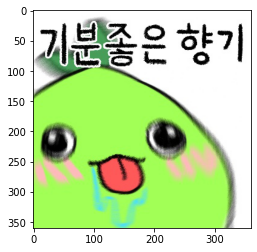

In [18]:
image = img.imread("/Users/chosungwon/Downloads/모코코.jpeg")
plt.imshow(image)

In [19]:
text_ocr

['기분좋은', '향기', '기분', '좋은', '향기']